In [1]:
using Test
using StatsBase
using Distributions
using Plots
using FFTW


(process:3664): GLib-GIO-WARNING **: 09:24:11.274: Unexpectedly, UWP app `D5BE6627.UltraZipOpener_2.0.6.0_neutral__9pm2v9747qaaa' (AUMId `D5BE6627.UltraZipOpener_9pm2v9747qaaa!App') supports 127 extensions but has no verbs

(process:3664): GLib-GIO-WARNING **: 09:24:11.555: Unexpectedly, UWP app `KDEe.V.Okular_22.801.1132.0_x64__7vt06qxq7ptv8' (AUMId `KDEe.V.Okular_7vt06qxq7ptv8!KDEe.V.Okular') supports 5 extensions but has no verbs

(process:3664): GLib-GIO-WARNING **: 09:24:11.603: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.5.0.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs


In [2]:
@test true
@test isapprox(pdf(Poisson(5), 3), 0.14037; atol=1e-5)

Test Passed

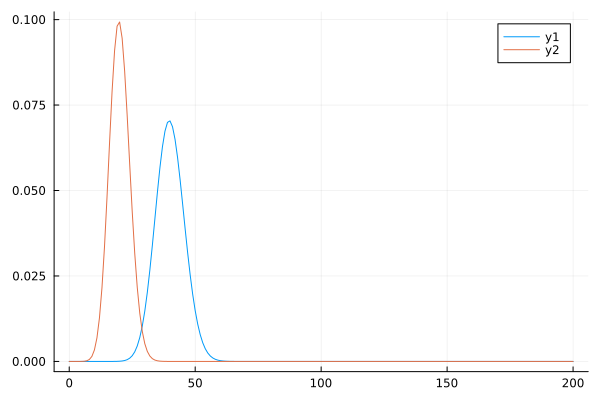

In [3]:
conv = convolve(Binomial(100, 0.2), Binomial(100, 0.2))
xs = [i for i in 0:200]
convolution_plot = plot()
ys = [pdf(conv, x) for x in xs]
plot!(xs,ys)
plot!(xs, [pdf(Binomial(100, 0.2), x) for x in xs])
display(convolution_plot)

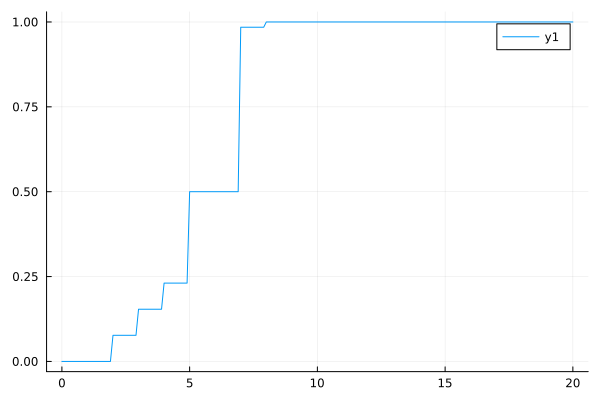

In [4]:
observations = [2, 3, 4, 5, 7, 8]
weights = Weights([1, 1, 1, 3.5, 6.3, 0.2])
empirical_distribution = ecdf(observations; weights)
xs = [i for i in 0:0.1:20]
empirical_plot = plot()
ys = [empirical_distribution(x) for x in xs]
plot!(xs,ys)
display(empirical_plot)

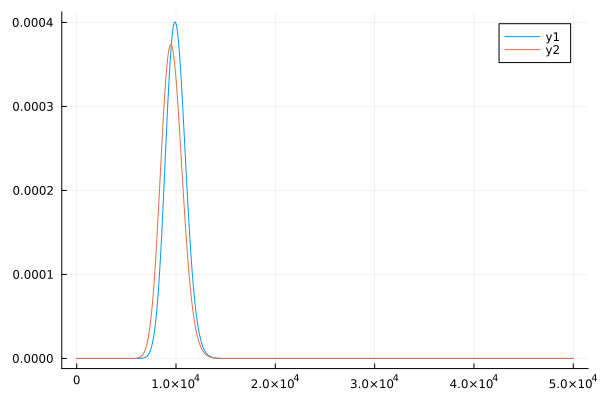

In [19]:
step = 25
base_points_1 = 0:step:50000
vector_values_gamma_1 = [pdf(Gamma(100,100), x) for x in base_points_1]
vector_values_gamma_2 = [pdf(Gamma(80,120), x) for x in base_points_1]
p = plot()
plot!(base_points, vector_values_gamma_1)
plot!(base_points, vector_values_gamma_2)
display(p)

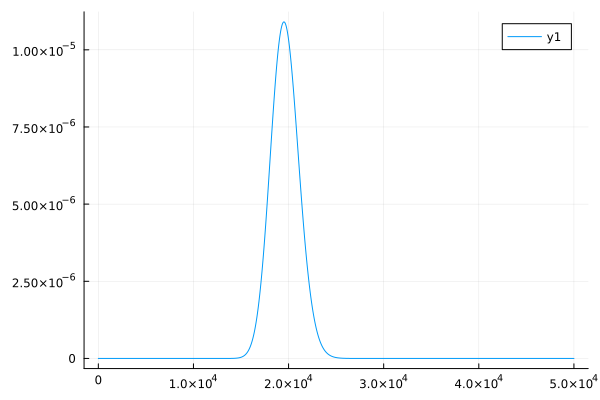

In [20]:
convolution = []
for x in base_points_1
    l = div(x, step)
    tot = 0
    for i in 0:(l-1)
        tot += vector_values_gamma_1[i + 1] * vector_values_gamma_2[l-i]
    end
    push!(convolution, tot)
end
p = plot()
plot!(base_points, convolution)
display(p)   

In [79]:
function fft_conv(d_1, d_2, limit)
    q = max(quantile(d_1, 1-limit), quantile(d_2, 1-limit)) * 8
    p = min(quantile(d_1, limit), quantile(d_2, limit)) * 1/8
    grid_trial = round(p):max(1, (div(round(q) - round(p),1e4))):round(q)
    grid = 0:100:1e8
    vector_values_1 = [pdf(d_1, x) for x in grid]
    vector_values_2 = [pdf(d_2, x) for x in grid]
    vector_conv = real(ifft(fft(vector_values_1).*fft(vector_values_2)))
    print(length(vector_conv))
    weights = Weights(vector_conv)
    return ecdf(grid; weights)
end

fft_conv (generic function with 1 method)

100001

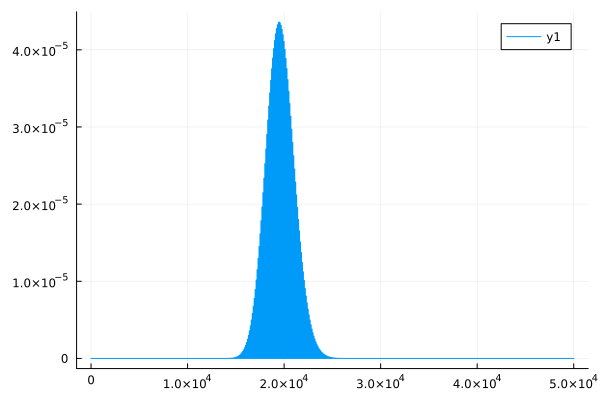

In [80]:
conv = fft_conv(Gamma(100, 100), Gamma(80, 120), 0.0000001)
p = plot()
plot!(base_points, [(conv(x) - conv(x - step))/step^2 for x in base_points])
display(p) 

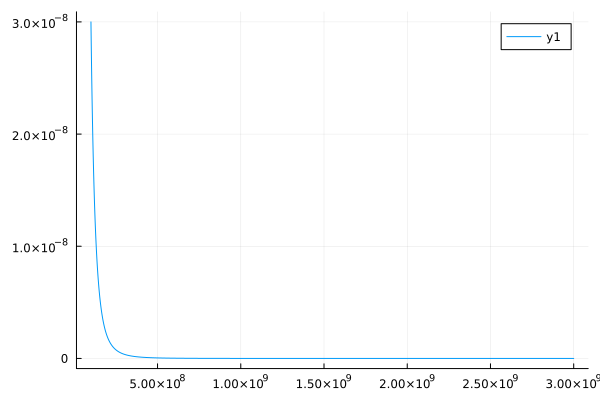

In [65]:
frequency = Poisson(4)
threshold = 1e8
severity = Pareto(3, threshold)
p = plot()
xs = threshold:(threshold / 1000):(threshold*30)
plot!(xs, [pdf(severity, x) for x in xs])
display(p)

In [66]:
struct FrequencySeverity
    frequency
    severity
end

function StatsBase.rand(fs::FrequencySeverity)
    tot = 0
    f = rand(fs.frequency)
    if f == 0 return 0 end
    for i in 1:f
        tot += rand(fs.severity)
    end
    return tot
end

function StasBase.rand(fs::FrequencySeverity, n::Int)
    return [rand(FrequencySeverity) for x in 1:n]
end
    
    
fs = FrequencySeverity(frequency, severity)

rand(fs)

9.372361547196283e8